In [25]:
import cv2, os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [26]:
dx, dy = 1, 1

Filtered .tiff have (n, m) shapes from 0, 1023. Raw .tiff have (n, m, 4) shapes (RGBA). I guess we converted the Raw images before saving.
I'll work with Filtered images first, this way I can also test for Gaussianness.

For the Raw images, I may chose the first column as the data. This somewhat compresses the data 0-1023 -> 0-255, but if the conversion is linear, after normalizing with total power, I should be able to obtain the same results as I'd have used unconverted data (with perhaps higher error arising from compression).

In [112]:
def y_integrate(A: np.ndarray, dy: float):
    return integrate.trapezoid(A.T, dx=dy)

def x_integrate(A: np.ndarray, dx: float):
    return integrate.trapezoid(A, dx=dx)

def integrate_2d(A, dx, dy):
    return x_integrate(y_integrate(A, dy), dx)

def center_of_mass(A, X, Y, dx, dy):
    x0 = integrate_2d(X * A, dx, dy)
    y0 = integrate_2d(Y * A, dx, dy)
    return x0, y0

In [113]:
# filedir = "Data/85-0mA_Raw_ZScan_0-2mm"
filedir = "Data/85-0mA_Filtered_ZScan_0-2mm"
number = lambda filename: int(filename.split("_")[-1].replace(".tif", ""))
filenames = sorted(os.listdir(filedir), key=number)

irradiances = []
for filename in filenames:
    irradiances.append((number(filename), np.array(Image.open(os.path.join(filedir, filename)))))

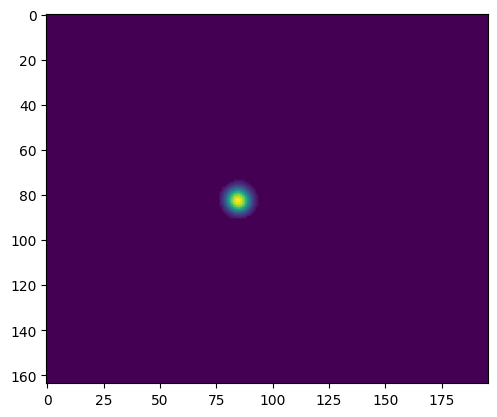

In [114]:
irradiance = irradiances[17][1]#[75:100, 70:90]
irradiance[irradiance < np.max(irradiance)/np.e**3] = 0
plt.imshow(irradiance)

In [115]:
power = integrate_2d(irradiance, dx, dy)
ypixels, xpixels = irradiance.shape
ymax, xmax = dy * ypixels, dx * xpixels
Y, X = np.mgrid[0:ymax:dy, 0:xmax:dx]

x0, y0 = center_of_mass(irradiance / power, X, Y, dx, dy)

In [116]:
print(x0, y0)

84.81111594328955 82.40478385665824


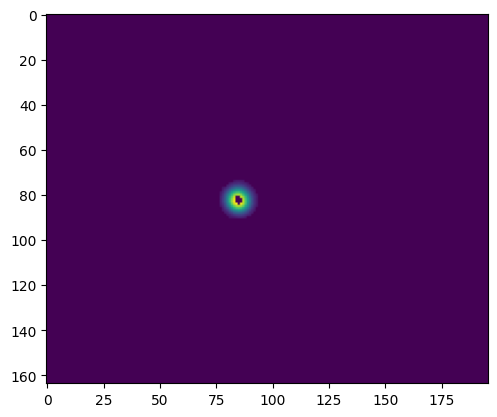

In [117]:
irradiance[(X - x0)**2 + (Y - y0)**2 < 3] = 0
plt.imshow(irradiance)

int.trapz integrates over X, then Y

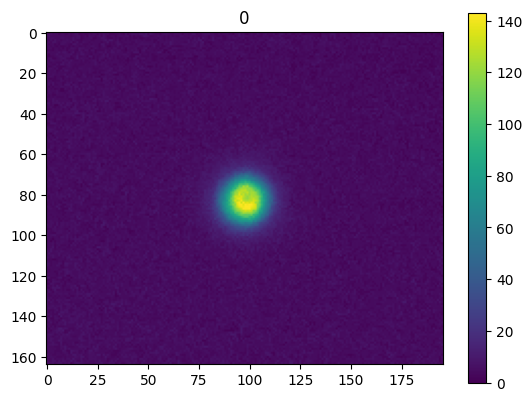

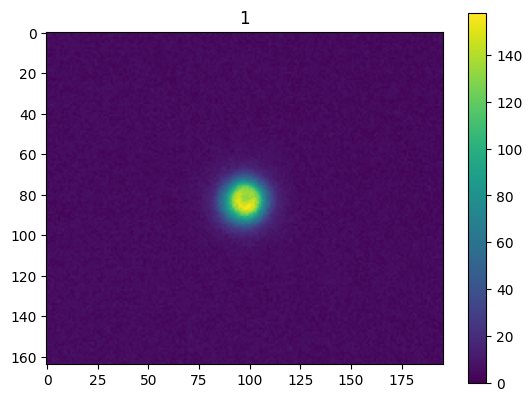

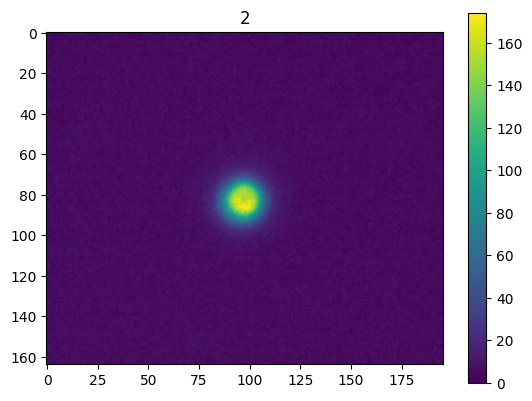

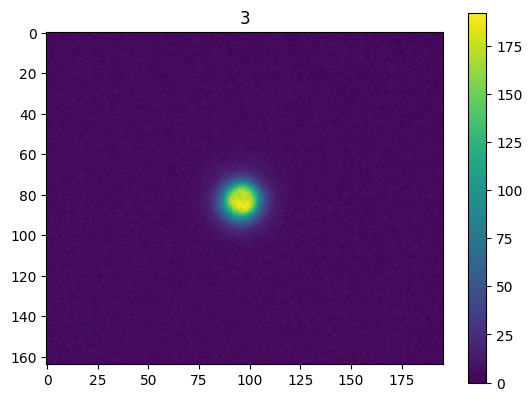

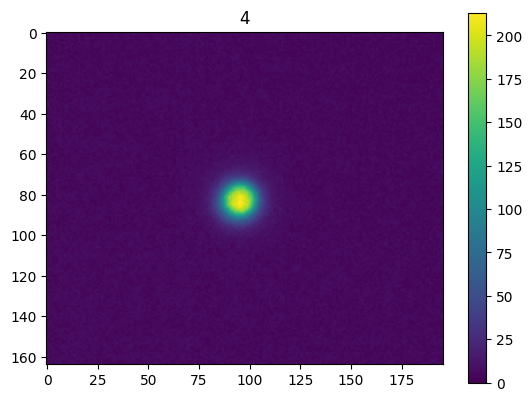

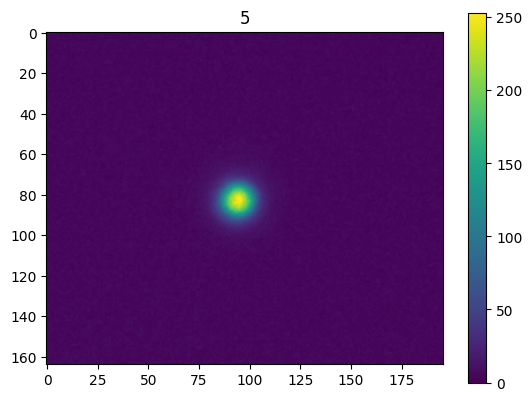

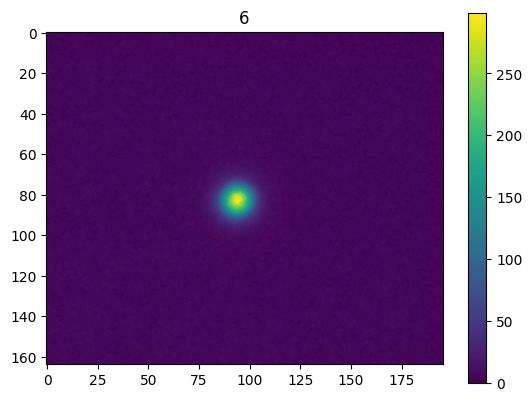

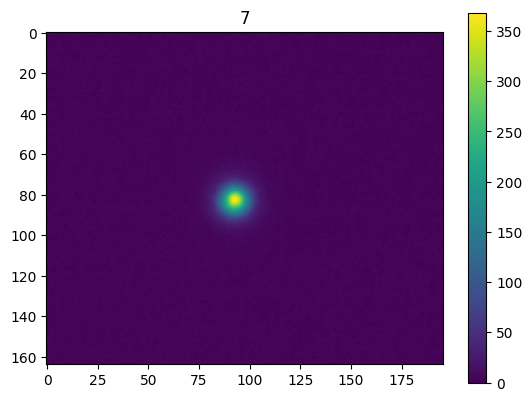

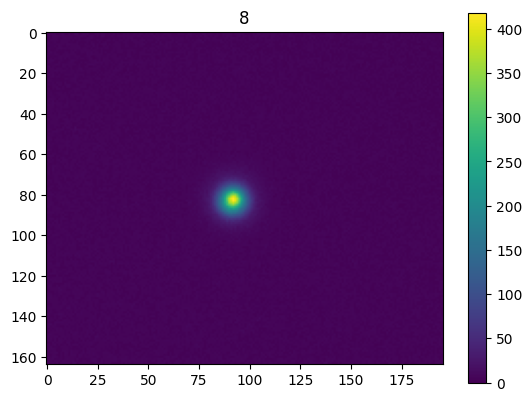

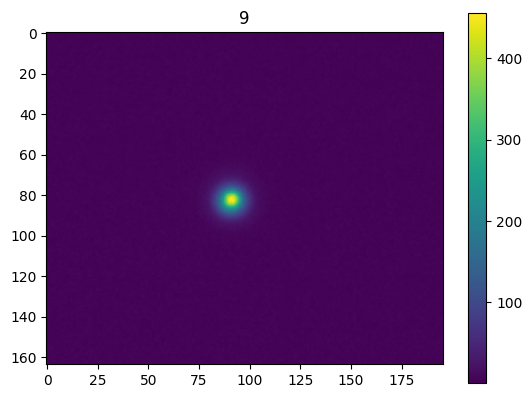

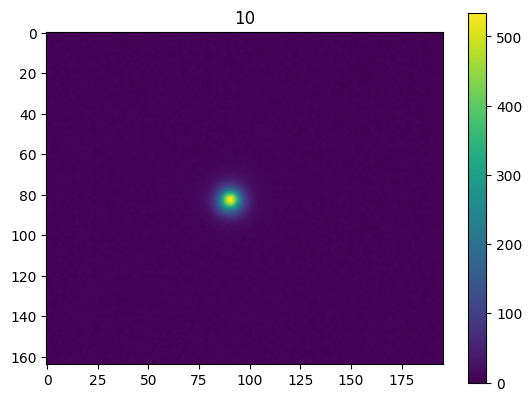

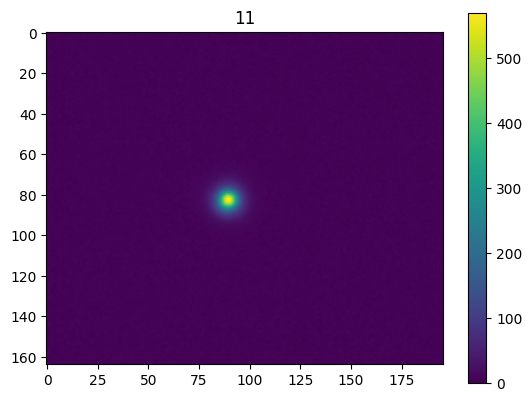

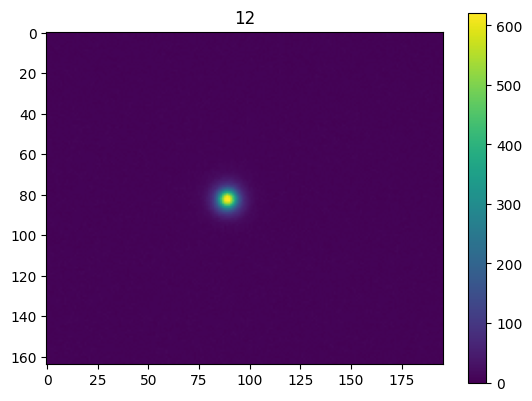

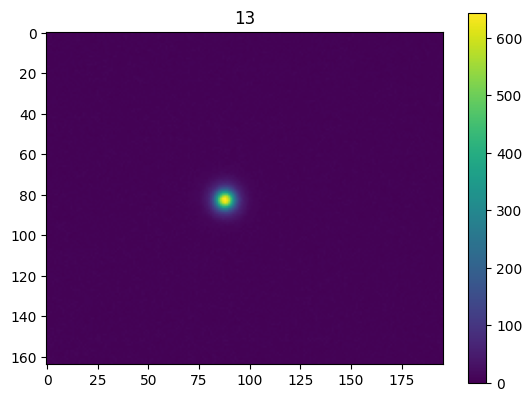

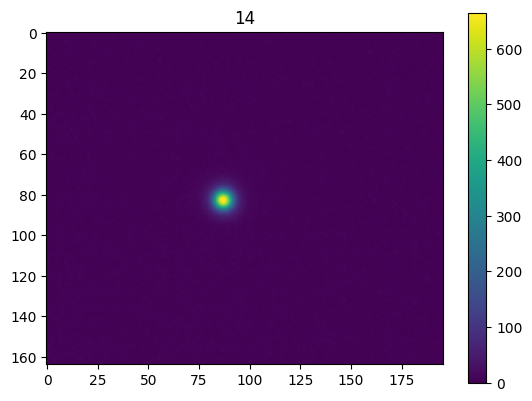

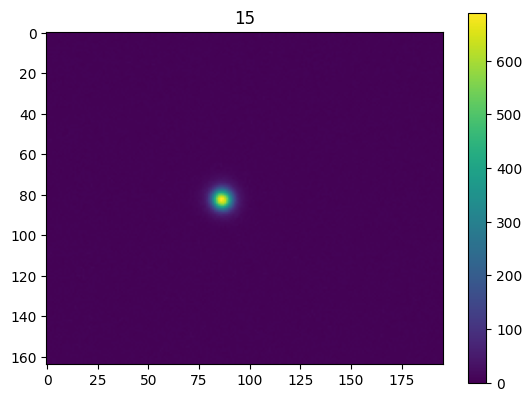

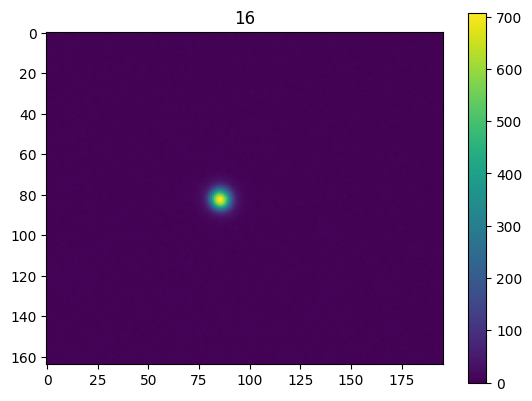

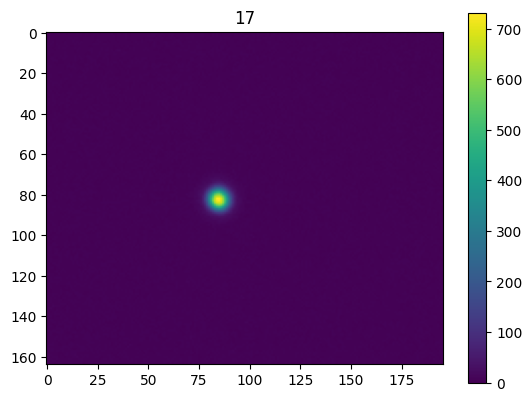

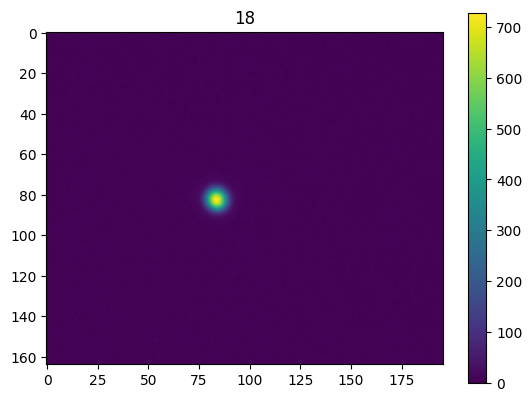

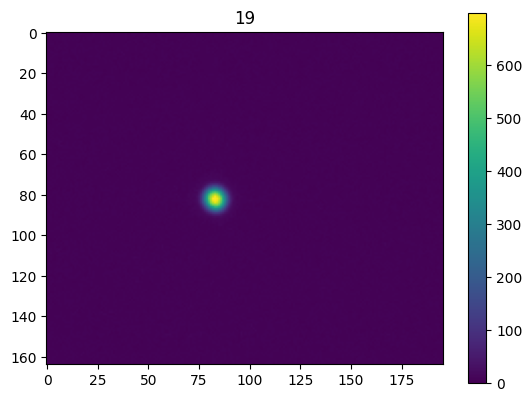

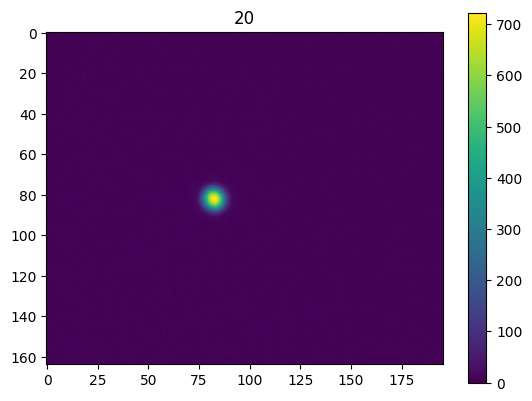

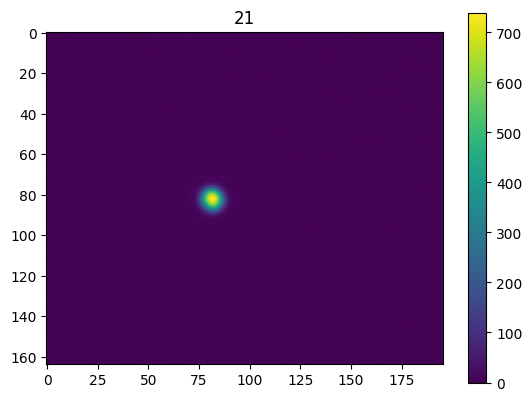

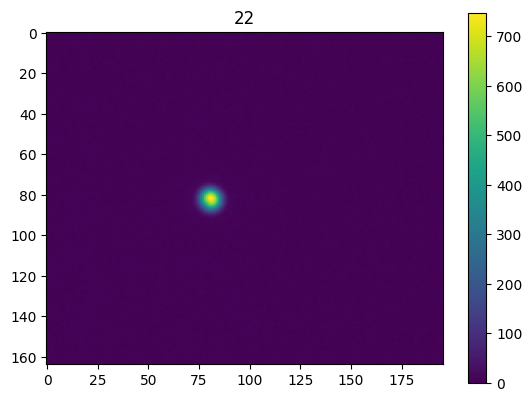

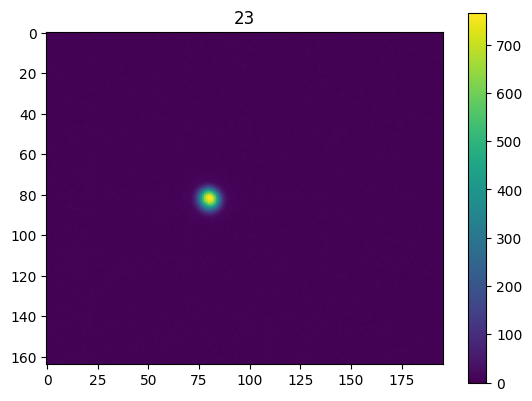

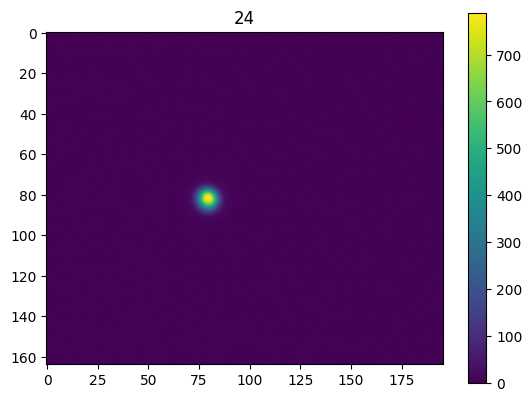

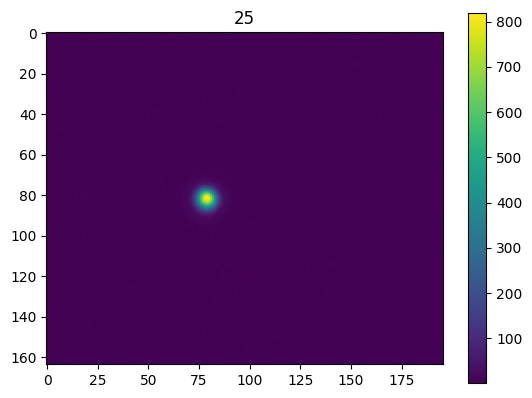

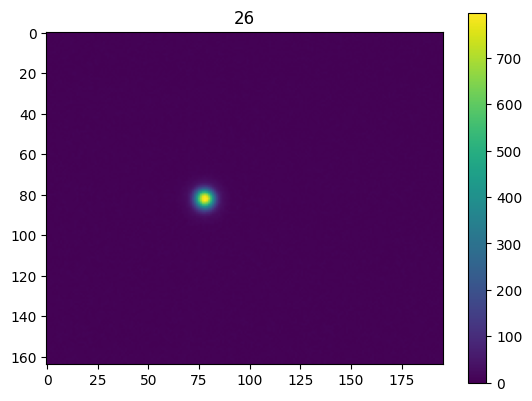

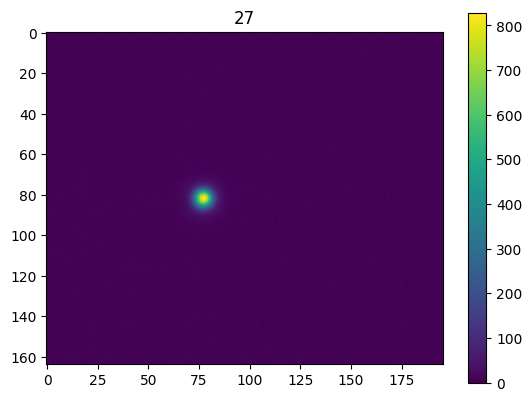

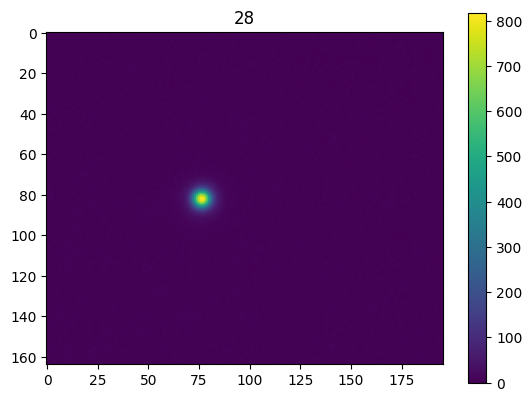

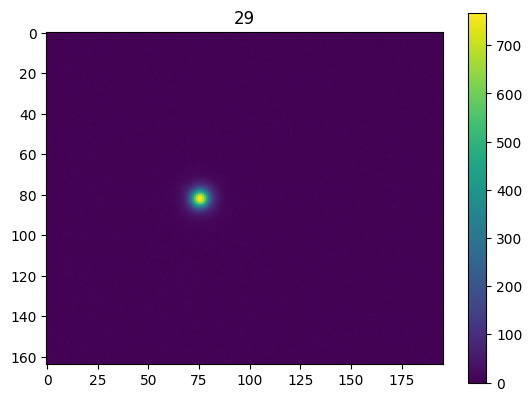

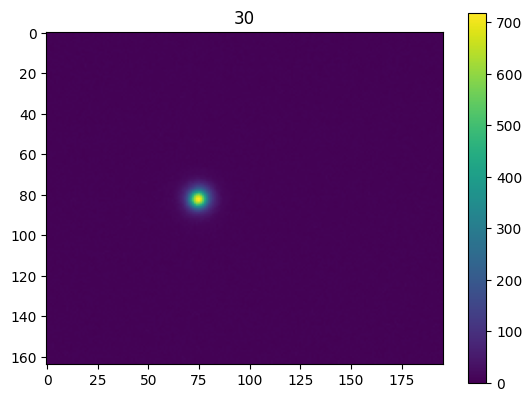

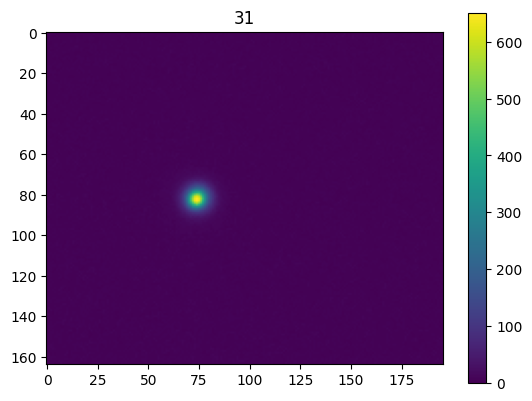

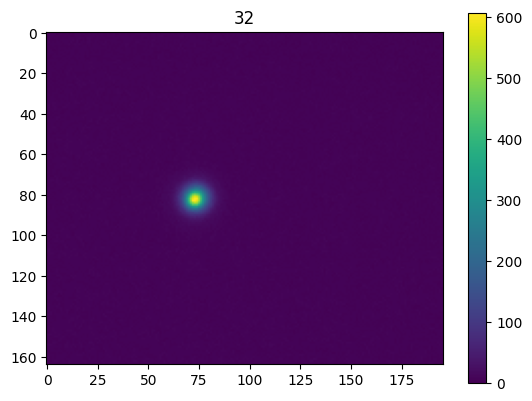

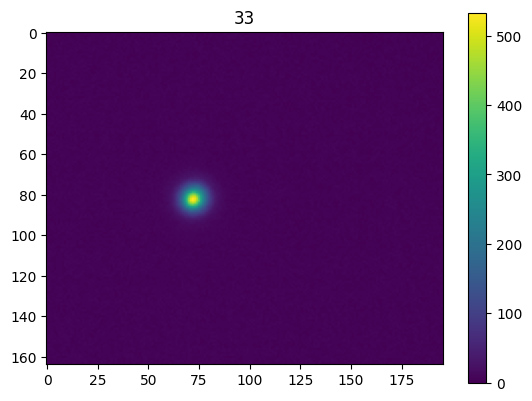

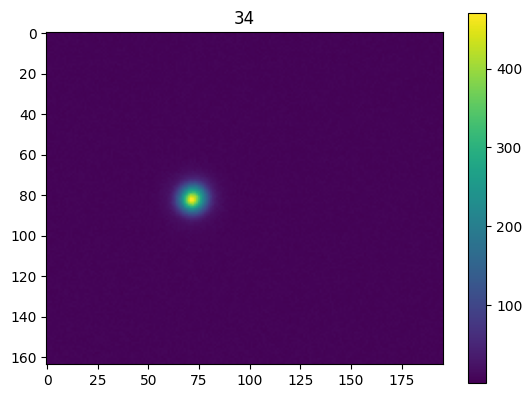

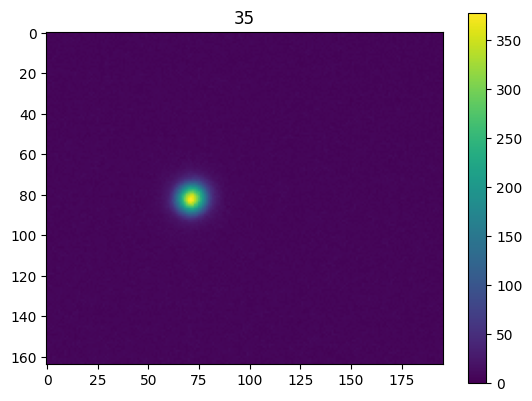

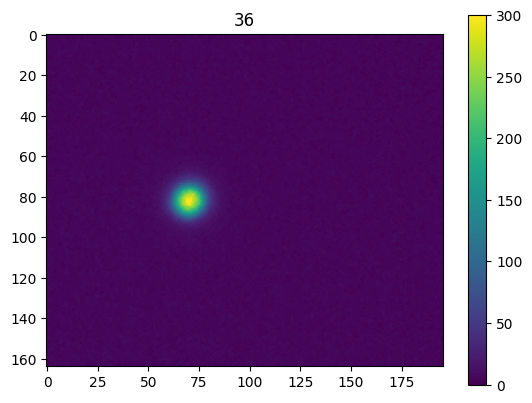

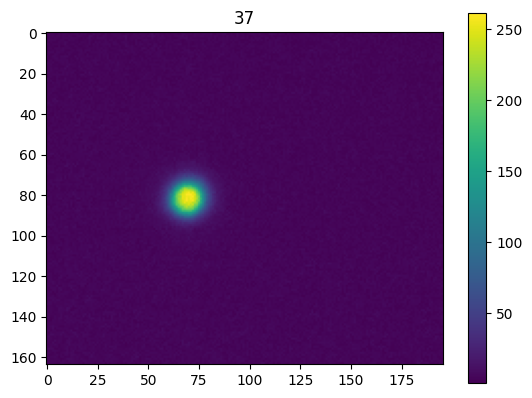

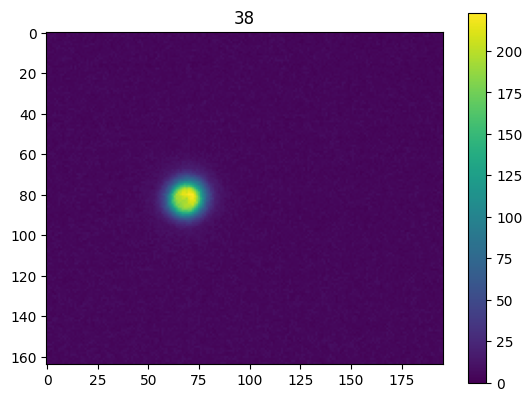

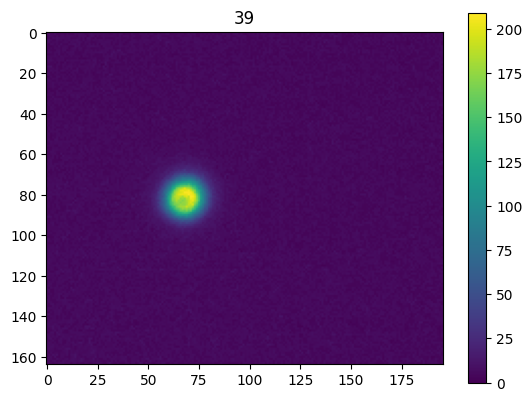

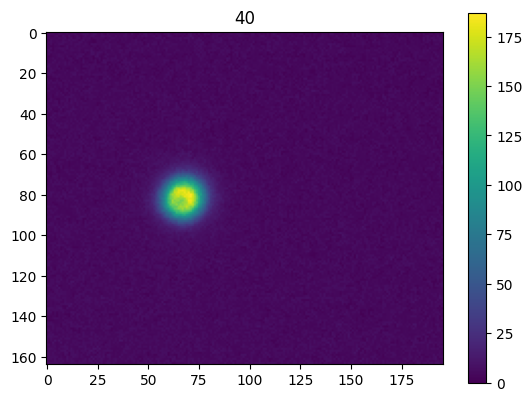

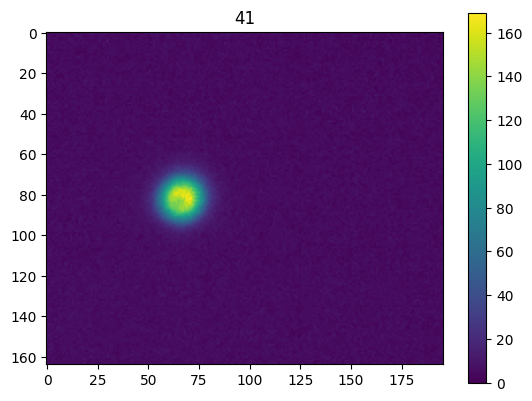

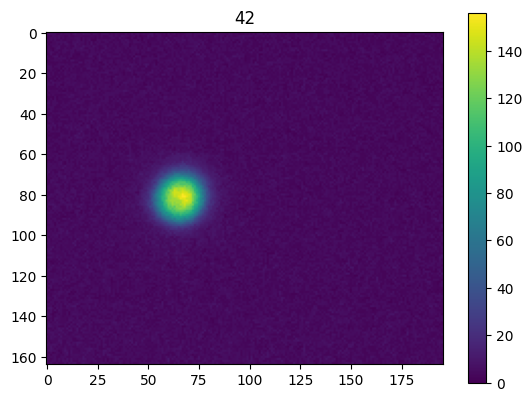

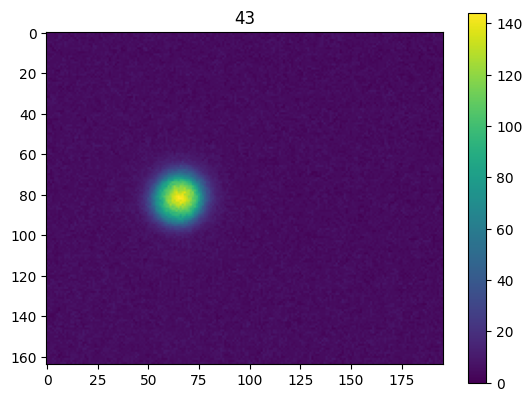

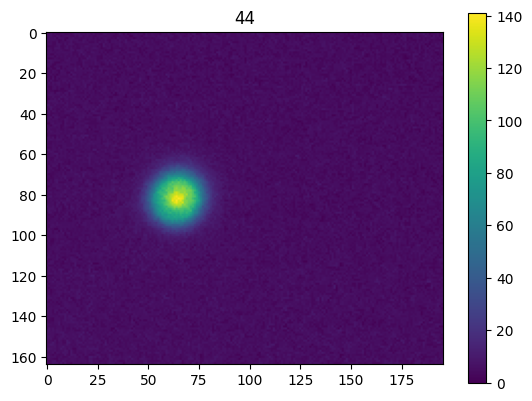

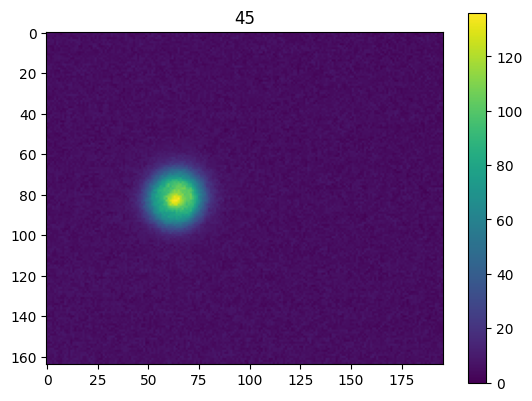

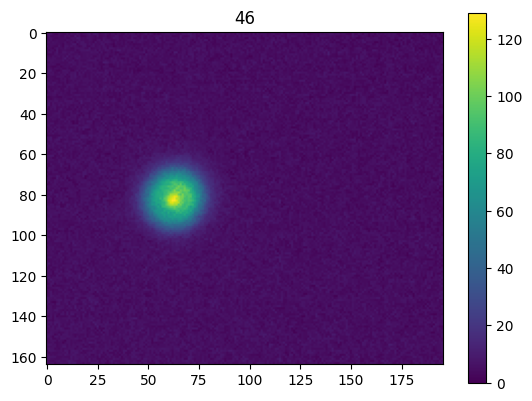

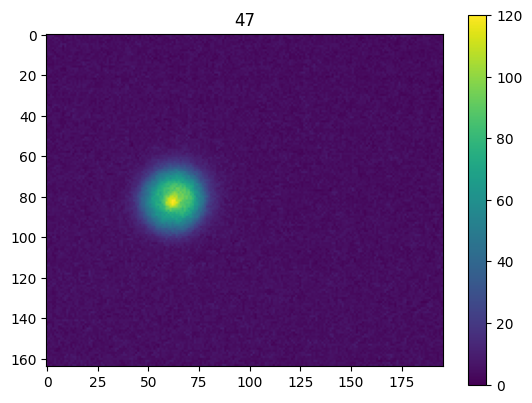

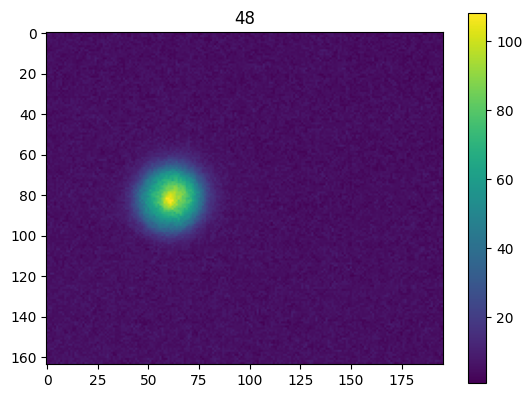

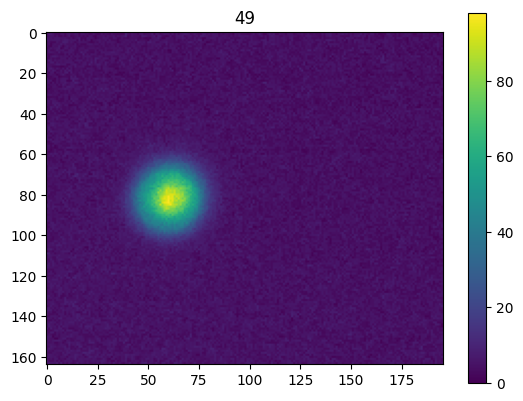

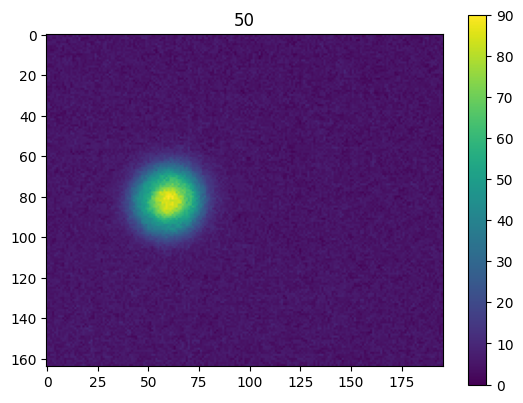

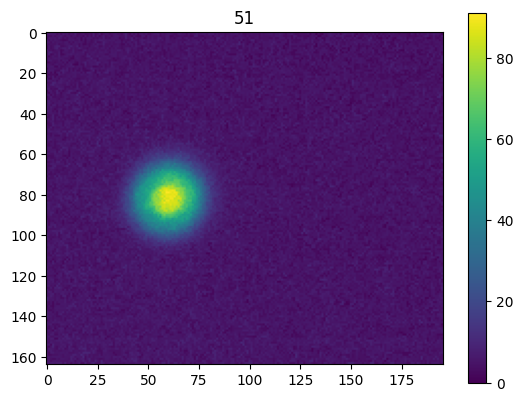

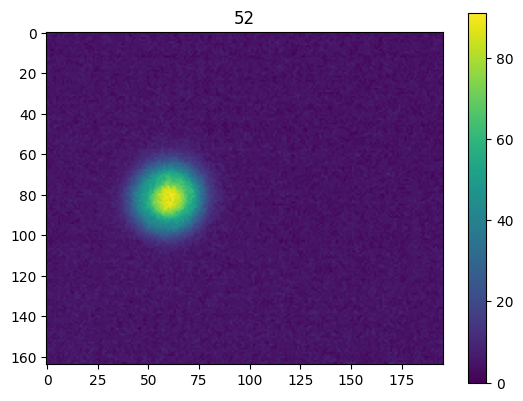

In [52]:
for n, imarray in images:
    fig, ax = plt.subplots()
    im = ax.imshow(imarray)
    ax.set(title=n)
    fig.colorbar(im)
    plt.show()